In [1]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt

In [2]:
from utils import *
from preprocess import *

In [3]:
df_temp = pd.read_csv("../../../PEW_1k.csv")
    
## rename columns
df_ans = df_temp.rename(columns={
    'Worker ID': 'id',
    'Saving for the future': 'saving',
    'Paying for college': 'tuition',
    'Buying a home': 'home',
    'Finding a spouse or partner': 'spouse',
    'Finding a job': 'job',
    'Getting into college': 'college',
    'Staying in touch with family and friends': 'comm',
    'Do you currently live in the United States?': 'us',
    'What is your age?': 'age',
    'What do you think the median home price in the US is in 2021?': 'e_home',
    'What do you think is the average household income in the US for 2021?': 'e_income',
    'What is the gas price in your area?': 'e_gas',
    'What is the acceptance percentage when applying to Harvard University as an undergraduate?': 'e_harvard',
    'What is the number of states in the United States?': 'e_state',
    'In the US, about how many people do you think use the internet in 2021, in millions?': 'e_internet',
    'What do you think is the average annual tuition of public colleges in the US in 2021?': 'e_tuition',
    'In what year will the US will hold its next presidential election?': 'e_election'
}, errors="raise").drop(columns=[])

In [9]:
df_ans["updated"] = pd.to_datetime(df_ans["updated"])

In [18]:
updated_since_start = df_ans["updated"] - df_ans["updated"][0]

<Axes: >

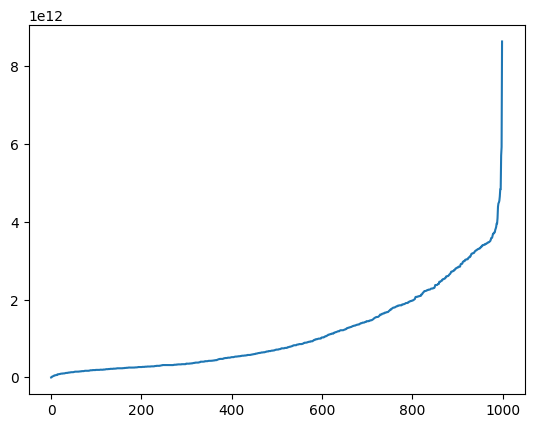

In [19]:
updated_since_start.plot()

In [34]:
delta_seconds = updated_since_start.diff().dt.seconds
delta_seconds

0         NaN
1         4.0
2        18.0
3         5.0
4         4.0
        ...  
995     186.0
996       0.0
997     869.0
998     217.0
999    2708.0
Name: updated, Length: 1000, dtype: float64

<Axes: >

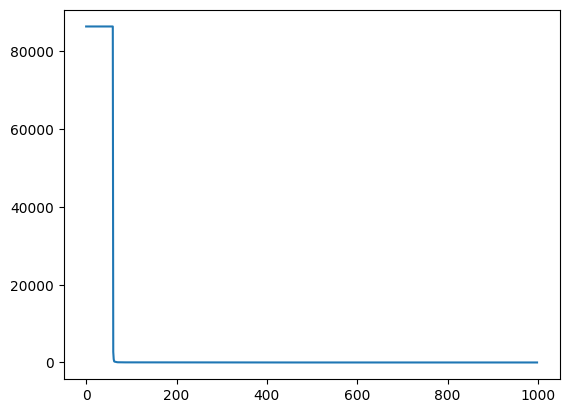

In [58]:
delta_seconds.sort_values(ascending=False).reset_index(drop=True).plot()

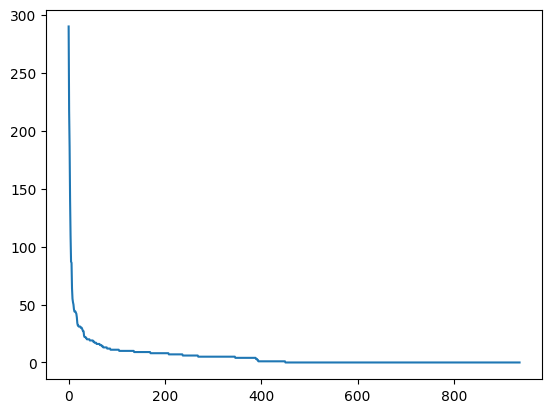

In [62]:
delta_seconds[delta_seconds < 300].sort_values(ascending=False).reset_index(drop=True).plot()
plt.show()

In [55]:
delta_seconds[delta_seconds >= 300].sort_values()

997      869.0
999     2708.0
251    86398.0
958    86399.0
305    86399.0
        ...   
263    86399.0
266    86399.0
268    86399.0
286    86399.0
284    86399.0
Name: updated, Length: 62, dtype: float64

In [104]:
events = pd.Series(1, index=updated_since_start)
events_count = events.resample('1min').sum()
events_count

updated
0 days 00:00:00    11
0 days 00:01:00    26
0 days 00:02:00    49
0 days 00:03:00    73
0 days 00:04:00    79
                   ..
0 days 02:19:00     0
0 days 02:20:00     0
0 days 02:21:00     0
0 days 02:22:00     0
0 days 02:23:00     1
Freq: T, Length: 144, dtype: int64

In [119]:
events_prob = events_count / events_count.sum()
events_prob.reset_index(drop=True, inplace=True)
events_prob

0      0.011
1      0.026
2      0.049
3      0.073
4      0.079
       ...  
139    0.000
140    0.000
141    0.000
142    0.000
143    0.001
Length: 144, dtype: float64

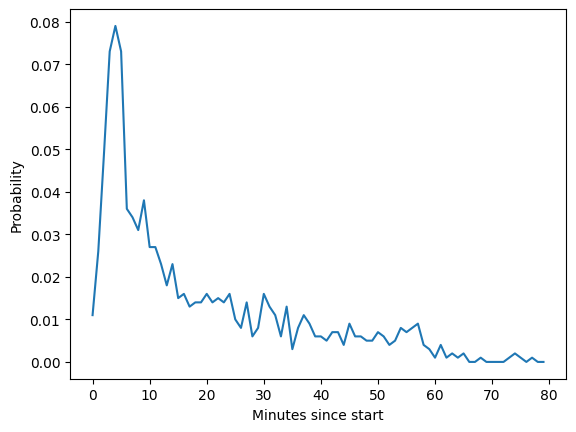

In [127]:
plt.plot(events_prob[:80])
plt.ylabel('Probability')
plt.xlabel('Minutes since start')

plt.show()

In [126]:
from scipy.stats import poisson
from scipy.optimize import curve_fit

# Generate some sample data
# data = np.array(delta_seconds[delta_seconds < 300])
data = np.array(events_count)

# Define the Poisson PDF function
def poisson_func(k, lamb):
    return poisson.pmf(k, lamb)

# Fit the data to the Poisson distribution
params, cov = curve_fit(poisson_func, np.arange(0, max(data)+1), np.histogram(data, bins=np.arange(0, max(data)+2))[0]/len(data))

# Print the fitted parameters
print("Lambda: ", params[0])

Lambda:  0.4893315003600639


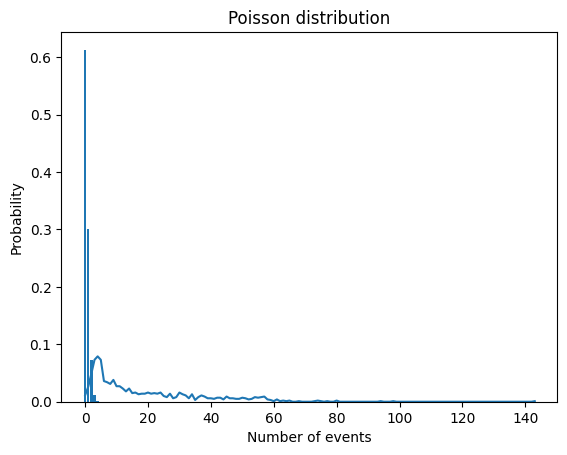

In [123]:
# Define the Poisson distribution with lambda=2
pois_dist = poisson(mu=params[0])

# Generate the x and y values for the Poisson PMF
x = np.arange(0, 60)
y = pois_dist.pmf(x)

# Plot the Poisson PMF
plt.bar(x, y)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson distribution')

plt.plot(events_prob)

plt.show()